In [120]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [121]:
df=sns.load_dataset("iris")

In [122]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [123]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [124]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [126]:
lb=LabelEncoder()
df['species']=lb.fit_transform(df['species'])

In [127]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [128]:
X=df.drop(['species','petal_width'],axis=1)
y=df['species']

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=20,random_state=0)

<Axes: xlabel='species', ylabel='Count'>

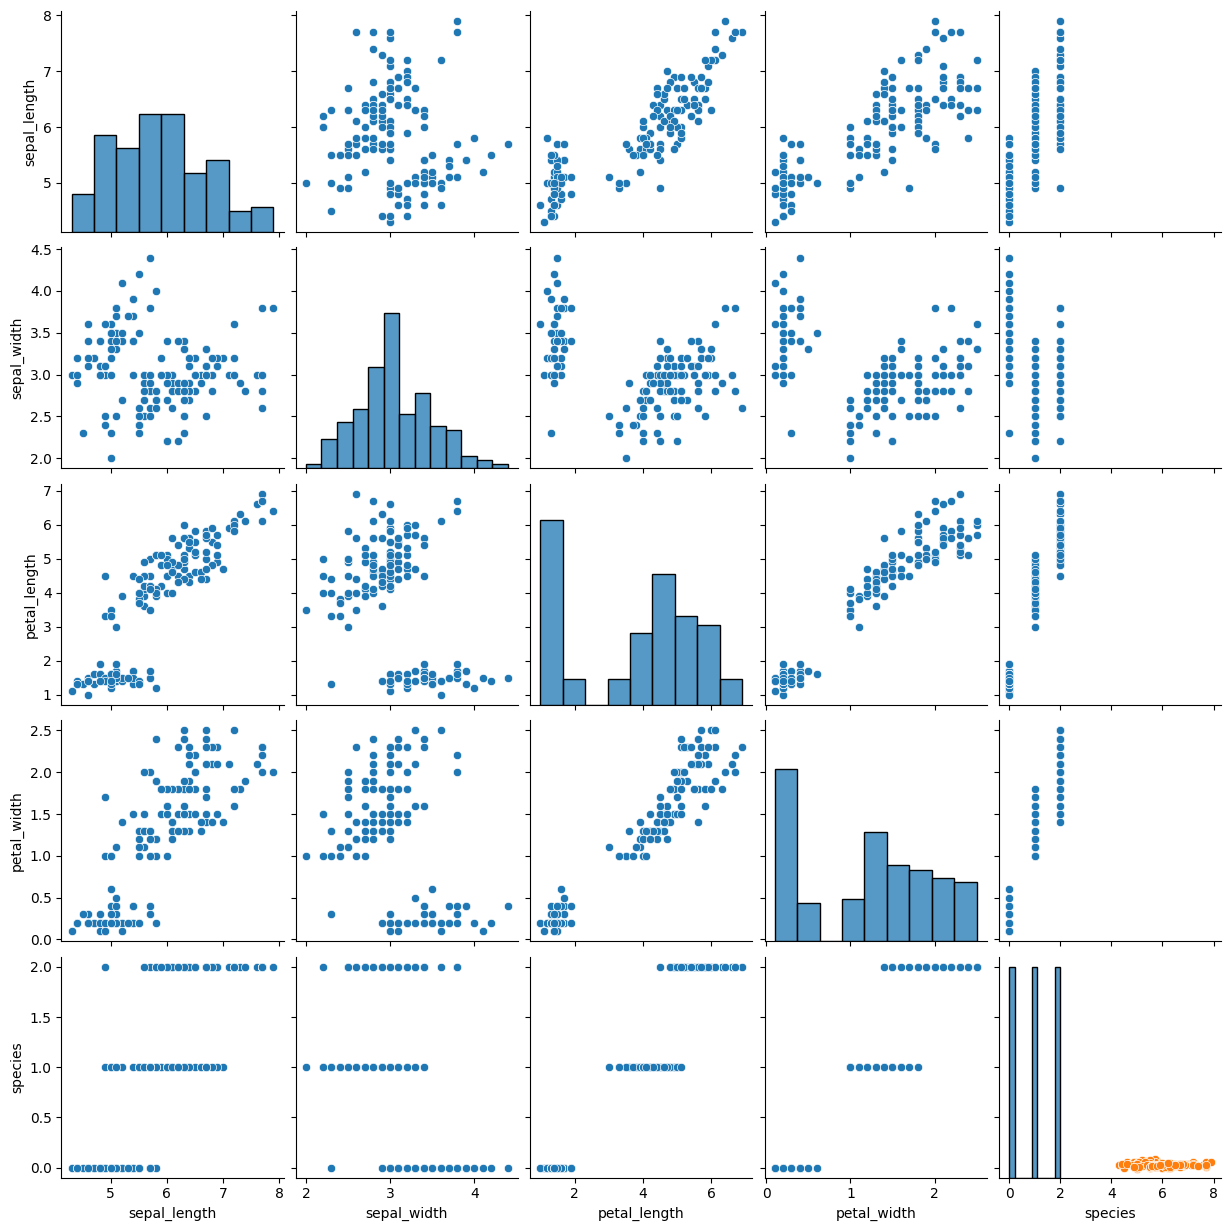

In [130]:
sns.pairplot(df)
sns.scatterplot(df,x='sepal_length',y='sepal_width')

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [132]:
md1=LogisticRegression()
md2=DecisionTreeClassifier()
md3=KNeighborsClassifier()

In [133]:
estimators=[('lor',md1),('dsc',md2),('kn',md3)]

In [134]:
for estimator in estimators:
  x=cross_val_score(estimator[1],X,y,cv=5,scoring='accuracy')
  print(estimator[0],np.mean(x),2)

lor 0.9533333333333334 2
dsc 0.9466666666666667 2
kn 0.9466666666666667 2


In [135]:
#Applying ensemble method (hard -bydeafautl)

In [138]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=estimators,voting ='hard')

x=cross_val_score(vc,X, y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.95


In [141]:
#soft
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=estimators,voting ='soft')

x=cross_val_score(vc,X, y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))
print(x.mean())

0.95
0.9466666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
